In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt
from itkwidgets import view

In [2]:
input_filename = "BRAINIX_DICOM_FLAIR_IM-0001-0003.dcm" 
image = itk.imread(input_filename)
# Use ITK's functional, Pythonic interface. The filter type is implied by the
# type of the input image. The filter is eagerly executed, and the output image
# is directly returned.
smoothed = itk.median_image_filter(image)

# Alternatively, create filter objects. These filter objects can be connected in
# a pipeline to stream-process large datasets. To generate the output of the
# pipeline, .Update() must explicitly be called on the last filter of the
# pipeline.
#
# We can implicitly instantiate the filter object based on the type
# of the input image in multiple ways.

# Use itk.ImageFileReader instead of the wrapping function,
# itk.imread to illustrate this example.
reader = itk.ImageFileReader.New(FileName=input_filename)
# Here we specify the filter input explicitly
median = itk.MedianImageFilter.New(Input=reader.GetOutput())
# Same as above but shortened. Input does not have to be specified.
median = itk.MedianImageFilter.New(reader.GetOutput())
# Same as above. .GetOutput() does not have to be specified.
median = itk.MedianImageFilter.New(reader)

median.Update()
smoothed = median.GetOutput()

Image (000001C281C57FF0)
  RTTI typeinfo:   class itk::Image<unsigned short,3>
  Reference Count: 1
  Modified Time: 1135
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 955
  UpdateMTime: 1134
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [288, 288, 1]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [288, 288, 1]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [288, 288, 1]
  Spacing: [0.798611, 0.798611, 6]
  Origin: [-118.208, -118.008, 71.7517]
  Direction: 
0.999712 -0.00172781 -0.0239257
3.51948e-11 0.997403 -0.0720282
0.023988 0.0720075 0.997116

  IndexToPointMatrix: 
0.798381 -0.00137985 -0.143554
2.8107e-11 0.796537 -0.432169
0.0191571 0.057506 5.98269

  PointToIndexMatrix: 
1.25181 4.407e-11 0.0300371
-0.00216352 1.24892 0.0901659
-0.00398762 -0.

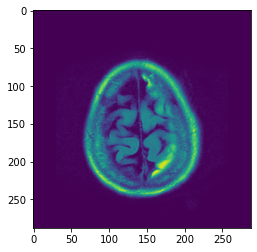

In [3]:
#input_filename = "BRAINIX_DICOM_FLAIR_IM-0001-0003.dcm"
image=itk.imread(input_filename)
print(image)
#imprime espaceado de pixel
print(image.GetSpacing())
#se aplica un filtro a la imagen
median_filtered=itk.MeanImageFilter(image)
#convierte imagen itk a un arreglo de numply
np_view0=itk.array_view_from_image(image)
plt.imshow(np_view0[0])
plt.show()

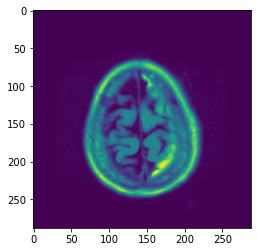

In [6]:
np_view1=itk.array_view_from_image(median_filtered)
plt.imshow(np_view1[0])
plt.show()

In [7]:
image = itk.imread(input_filename)
InputType = type(image)
# Find input image dimension
input_dimension = image.GetImageDimension()
# Select float as output pixel type
OutputType = itk.Image[itk.UC, input_dimension]

# Functional interface
casted = itk.cast_image_filter(image, ttype=(InputType, OutputType))

# Object-oriented interface
#cast_filter = itk.CastImageFilter[InputType, OutputType].New()
#cast_filter.SetInput(image)
#cast_filter.Update()
#casted = cast_filter.GetOutput()

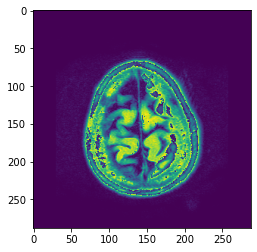

In [8]:
np_view2=itk.array_view_from_image(casted)
plt.imshow(np_view2[0])
plt.show()